In [1]:
#!pip install python-mnist
#!pip install mnist

In [40]:
import numpy as np
import mnist_reader
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load Dataset 

In [41]:
X_train, Y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, Y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

# Process dataset

In [42]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

proc_X_train, proc_Y_train = [],[]
proc_X_test, proc_Y_test = [],[]

for i in range(len(X_train)):
    if Y_train[i] in [5,7]:
        proc_X_train.append(X_train[i])
        if Y_train[i] == 5:
            proc_Y_train.append(0)
        else:
            proc_Y_train.append(1)

for j in range(len(X_test)):
    if Y_test[j] in [5,7]:
        proc_X_test.append(X_test[j])
        if Y_test[j] == 5:
            proc_Y_test.append(0)
        else:
            proc_Y_test.append(1)
            
proc_X_train = np.array(proc_X_train)
proc_X_train = proc_X_train / 255
proc_Y_train = np.array(proc_Y_train)

proc_X_test = np.array(proc_X_test)
proc_X_test = proc_X_test / 255
proc_Y_test = np.array(proc_Y_test)


# Logistic Regression

In [5]:
%%time
C_values = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1,1e2,1e3,1e4]
train_acc, test_acc = [],[]
for c in C_values:
    print(c)
    model = LogisticRegression(C=c, solver="lbfgs", penalty="l2", max_iter = 10000000)
    model.fit(proc_X_train, proc_Y_train)
    pred_y = model.predict(proc_X_test)
    test_acc.append(metrics.accuracy_score(proc_Y_test, pred_y))
    train_acc.append(model.score(proc_X_train, proc_Y_train))

1e-08
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1
10.0
100.0
1000.0
10000.0
Wall time: 2min 7s


0.96
[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0]
[0.5375, 0.86, 0.8595, 0.8615, 0.8795, 0.9205, 0.9485, 0.96, 0.958, 0.9535, 0.95, 0.946, 0.9465]
0.1


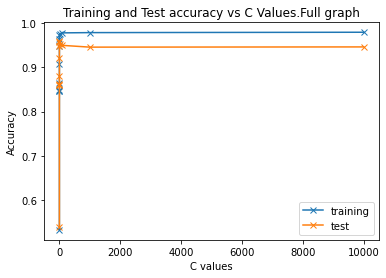

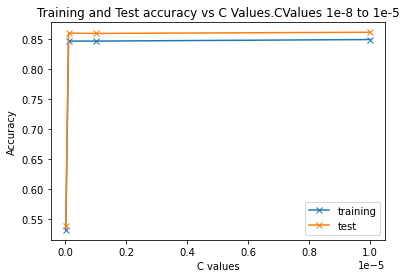

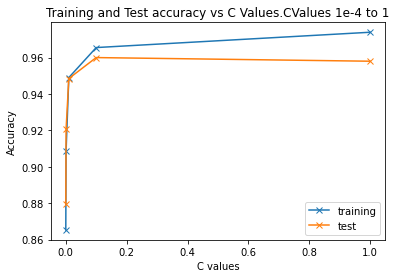

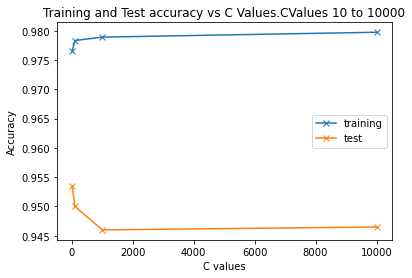

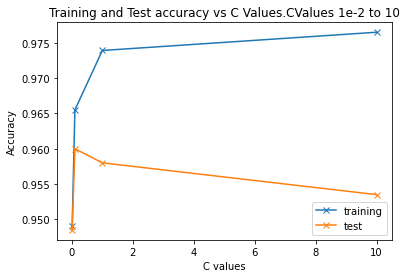

In [6]:
C_values1 = [1e-8, 1e-7, 1e-6, 1e-5]
C_values2 = [1e-4,1e-3,1e-2, 1e-1, 1]
C_values3 = [1e1,1e2,1e3,1e4]
C_showcase = [1e-2,1e-1,1,1e1]

fig, ax = plt.subplots()
ax.set_xlabel("C values")
ax.set_ylabel("Accuracy")
ax.set_title("Training and Test accuracy vs C Values.Full graph")
#fig.set_size_inches(60,20)
ax.plot(C_values, train_acc, marker = 'x', label = 'training')
ax.plot(C_values, test_acc, marker = 'x', label = 'test')
ax.legend()
plt.savefig("fullLR.png")
print(max(test_acc))
print(C_values)
print(test_acc)
print(C_values[test_acc.index(max(test_acc))])

fig1, ax1 = plt.subplots()
ax1.set_xlabel("C values")
ax1.set_ylabel("Accuracy")
ax1.set_title("Training and Test accuracy vs C Values.CValues 1e-8 to 1e-5")
#fig.set_size_inches(60,20)
ax1.plot(C_values1, train_acc[0:4], marker = 'x', label = 'training')
ax1.plot(C_values1, test_acc[0:4], marker = 'x', label = 'test')
ax1.legend() 
plt.savefig("underfitLR.png")

fig2, ax2 = plt.subplots()
ax2.set_xlabel("C values")
ax2.set_ylabel("Accuracy")
ax2.set_title("Training and Test accuracy vs C Values.CValues 1e-4 to 1")
#fig.set_size_inches(60,20)
ax2.plot(C_values2, train_acc[4:9], marker = 'x', label = 'training')
ax2.plot(C_values2, test_acc[4:9], marker = 'x', label = 'test')
ax2.legend()
plt.savefig("goodLR.png")

fig3, ax3 = plt.subplots()
ax3.set_xlabel("C values")
ax3.set_ylabel("Accuracy")
ax3.set_title("Training and Test accuracy vs C Values.CValues 10 to 10000")
#fig.set_size_inches(60,20)
ax3.plot(C_values3, train_acc[9:], marker = 'x', label = 'training')
ax3.plot(C_values3, test_acc[9:], marker = 'x', label = 'test')
ax3.legend() 
plt.savefig("overfitLR.png")

fig4, ax4 = plt.subplots()
ax4.set_xlabel("C values")
ax4.set_ylabel("Accuracy")
ax4.set_title("Training and Test accuracy vs C Values.CValues 1e-2 to 10")
#fig.set_size_inches(60,20)
ax4.plot(C_showcase, train_acc[6:10], marker = 'x', label = 'training')
ax4.plot(C_showcase, test_acc[6:10], marker = 'x', label = 'test')
ax4.legend() 
plt.savefig("bridgeshowLR.png")

# Support Vector Machines

In [7]:
%%time
C_values = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1,1e2]
train_acc, test_acc = [],[]
for c in C_values:
    print(c)
    model = svm.SVC(C=c, kernel='linear')
    model.fit(proc_X_train, proc_Y_train)
    pred_y = model.predict(proc_X_test)
    test_acc.append(metrics.accuracy_score(proc_Y_test, pred_y))
    train_acc.append(model.score(proc_X_train, proc_Y_train))

1e-08
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1
10.0
100.0
Wall time: 11min 42s


0.9615
[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0]
[0.8595, 0.8595, 0.8595, 0.86, 0.9, 0.938, 0.952, 0.9615, 0.9595, 0.952, 0.951]
0.1


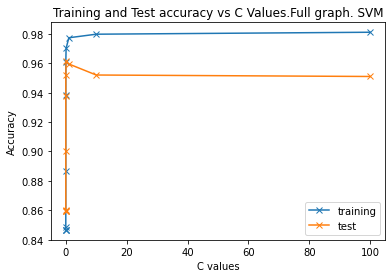

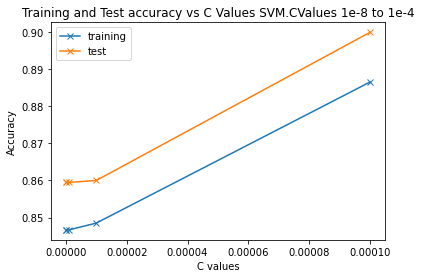

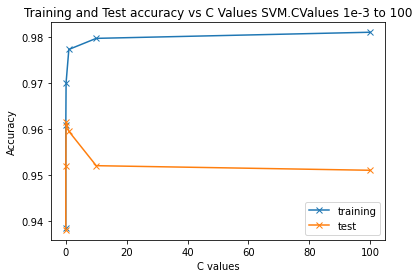

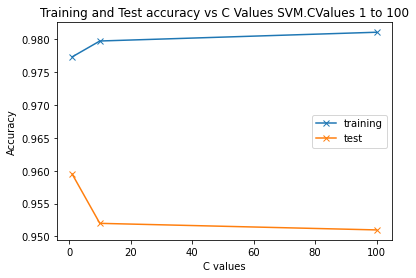

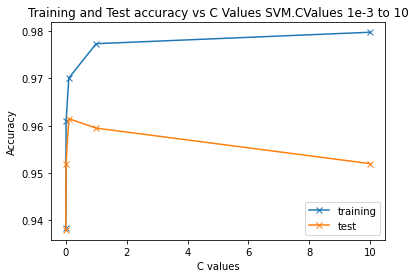

In [8]:
C_values1 = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
C_values2 = [1e-3,1e-2, 1e-1, 1, 1e1,1e2]
C_values3 = [1, 1e1,1e2]
C_showcase = [1e-3,1e-2,1e-1,1,1e1]


fig5, ax5 = plt.subplots()
ax5.set_xlabel("C values")
ax5.set_ylabel("Accuracy")
ax5.set_title("Training and Test accuracy vs C Values.Full graph. SVM")
#fig.set_size_inches(60,20)
ax5.plot(C_values, train_acc, marker = 'x', label = 'training')
ax5.plot(C_values, test_acc, marker = 'x', label = 'test')
ax5.legend()
plt.savefig("FullSVM.png")
print(max(test_acc))
print(C_values)
print(test_acc)
print(C_values[test_acc.index(max(test_acc))])

fig11, ax11 = plt.subplots()
ax11.set_xlabel("C values")
ax11.set_ylabel("Accuracy")
ax11.set_title("Training and Test accuracy vs C Values SVM.CValues 1e-8 to 1e-4")
#fig.set_size_inches(60,20)
ax11.plot(C_values1, train_acc[0:5], marker = 'x', label = 'training')
ax11.plot(C_values1, test_acc[0:5], marker = 'x', label = 'test')
ax11.legend() 
plt.savefig("underfitSVM.png")

fig22, ax22 = plt.subplots()
ax22.set_xlabel("C values")
ax22.set_ylabel("Accuracy")
ax22.set_title("Training and Test accuracy vs C Values SVM.CValues 1e-3 to 100")
#fig.set_size_inches(60,20)
ax22.plot(C_values2, train_acc[5:11], marker = 'x', label = 'training')
ax22.plot(C_values2, test_acc[5:11], marker = 'x', label = 'test')
ax22.legend()
plt.savefig("goodSVM.png")

fig33, ax33 = plt.subplots()
ax33.set_xlabel("C values")
ax33.set_ylabel("Accuracy")
ax33.set_title("Training and Test accuracy vs C Values SVM.CValues 1 to 100")
#fig.set_size_inches(60,20)
ax33.plot(C_values3, train_acc[8:], marker = 'x', label = 'training')
ax33.plot(C_values3, test_acc[8:], marker = 'x', label = 'test')
ax33.legend() 
plt.savefig("overfitSVM.png")

fig44, ax44 = plt.subplots()
ax44.set_xlabel("C values")
ax44.set_ylabel("Accuracy")
ax44.set_title("Training and Test accuracy vs C Values SVM.CValues 1e-3 to 10")
#fig.set_size_inches(60,20)
ax44.plot(C_showcase, train_acc[5:10], marker = 'x', label = 'training')
ax44.plot(C_showcase, test_acc[5:10], marker = 'x', label = 'test')
ax44.legend() 
plt.savefig("bridgeshowSVM.png")

# K-Fold Cross Validation - Logistic Regression

In [25]:
%%time
K_values = [5,6,7,8,9,10]
C_values = [0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18]

random_Xk_train = proc_X_train
random_Yk_train = proc_Y_train
#np.random.shuffle(random_Xk_train)
#np.random.shuffle(random_Yk_train)

combined_acc = []
for k in K_values:
    k_acc = []
    print(k)
    for c in C_values:
        X_fold = [x.tolist() for x in np.array_split(random_Xk_train, k)]
        Y_fold = [y.tolist() for y in np.array_split(random_Yk_train, k)]
        
        c_acc = []
        for i in range(k):
            x_train_k, y_train_k = [],[]
            x_test_k, y_test_k = [],[]
            for j in range(k):
                if j == i:
                    x_test_k.append(X_fold[j])
                    y_test_k.append(Y_fold[j])
                else:
                    x_train_k.append(X_fold[j])
                    y_train_k.append(Y_fold[j])
            
            x_train_k = [item for sublist in x_train_k for item in sublist]
            y_train_k = [item for sublist in y_train_k for item in sublist]
            x_test_k = [item for sublist in x_test_k for item in sublist]
            y_test_k = [item for sublist in y_test_k for item in sublist]
            
            model = LogisticRegression(C=c, solver="lbfgs", penalty="l2", max_iter = 10000000)
            model.fit(x_train_k, y_train_k)
            pred_y_k = model.predict(x_test_k)
            c_acc.append(metrics.accuracy_score(y_test_k, pred_y_k))
            
        k_acc.append(sum(c_acc)/len(c_acc))
    
    combined_acc.append(k_acc)

5
6
7
8
9
10
Wall time: 6min 12s


k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
[0.9588333333333333, 0.9584166666666668, 0.9589171081477623, 0.95875, 0.9596666407981308, 0.9594166666666666]
[0.18, 0.14, 0.18, 0.14, 0.18, 0.16]
[0, 1, 2, 3, 4, 5]
0.9596666407981308
0.18
9


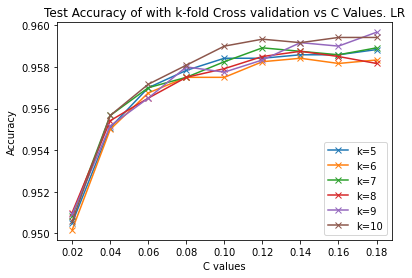

In [26]:
best_acc = []
best_c = []
best_k = []
figk, axk = plt.subplots()
axk.set_xlabel("C values")
axk.set_ylabel("Accuracy")
axk.set_title("Test Accuracy of with k-fold Cross validation vs C Values. LR")
for i in range(len(combined_acc)):
    axk.plot(C_values, combined_acc[i], marker = 'x', label = f'k={i+5}')
    print("k=",i)
    best_acc.append(max(combined_acc[i]))
    #best_c.append(C_values[combined_acc.index(max(combined_acc[i]))])
    best_c.append(C_values[combined_acc[i].index(max(combined_acc[i]))])
    best_k.append(i)
    
axk.legend()
plt.savefig("CVLR.png")

print(best_acc)
print(best_c)
print(best_k)
print(max(best_acc))
print(best_c[best_acc.index(max(best_acc))])
print(K_values[best_k[best_acc.index(max(best_acc))]])

# K-Fold Cross Validation - Support Vector Machine

In [27]:
%%time
K_values = [5,6,7,8,9,10]
C_values = [0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18]

random_Xk_train = proc_X_train
random_Yk_train = proc_Y_train
#np.random.shuffle(random_Xk_train)
#np.random.shuffle(random_Yk_train)

combined_acc = []
for k in K_values:
    k_acc = []
    print(k)
    for c in C_values:
        X_fold = [x.tolist() for x in np.array_split(random_Xk_train, k)]
        Y_fold = [y.tolist() for y in np.array_split(random_Yk_train, k)]
        
        c_acc = []
        for i in range(k):
            x_train_k, y_train_k = [],[]
            x_test_k, y_test_k = [],[]
            for j in range(k):
                if j == i:
                    x_test_k.append(X_fold[j])
                    y_test_k.append(Y_fold[j])
                else:
                    x_train_k.append(X_fold[j])
                    y_train_k.append(Y_fold[j])
            
            x_train_k = [item for sublist in x_train_k for item in sublist]
            y_train_k = [item for sublist in y_train_k for item in sublist]
            x_test_k = [item for sublist in x_test_k for item in sublist]
            y_test_k = [item for sublist in y_test_k for item in sublist]
            
            model = svm.SVC(C=c, kernel='linear')
            model.fit(x_train_k, y_train_k)
            pred_y_k = model.predict(x_test_k)
            c_acc.append(metrics.accuracy_score(y_test_k, pred_y_k))
            
        k_acc.append(sum(c_acc)/len(c_acc))
    
    combined_acc.append(k_acc)

5
6
7
8
9
10
Wall time: 48min 11s


k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
[0.961, 0.9600833333333333, 0.9603338165690395, 0.9592499999999999, 0.9601662659542947, 0.9605833333333335]
[0.08, 0.08, 0.06, 0.04, 0.08, 0.08]
[0, 1, 2, 3, 4, 5]
0.961
0.08
5


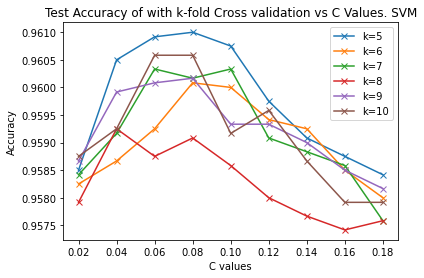

In [29]:
best_acc = []
best_c = []
best_k = []
figk1, axk1 = plt.subplots()
axk1.set_xlabel("C values")
axk1.set_ylabel("Accuracy")
axk1.set_title("Test Accuracy of with k-fold Cross validation vs C Values. SVM")
for i in range(len(combined_acc)):
    axk1.plot(C_values, combined_acc[i], marker = 'x', label = f'k={i+5}')
    print("k=",i)
    best_acc.append(max(combined_acc[i]))
    #best_c.append(C_values[combined_acc.index(max(combined_acc[i]))])
    best_c.append(C_values[combined_acc[i].index(max(combined_acc[i]))])
    best_k.append(i)
    
axk1.legend()
plt.savefig("CVSVM.png")

print(best_acc)
print(best_c)
print(best_k)
print(max(best_acc))
print(best_c[best_acc.index(max(best_acc))])
print(K_values[best_k[best_acc.index(max(best_acc))]])

# Optimal Logistic regression

In [43]:
model = LogisticRegression(C=0.18, solver="lbfgs", penalty="l2", max_iter = 10000000)
model.fit(proc_X_train, proc_Y_train)
pred_y = model.predict(proc_X_test)
# test_acc.append(metrics.accuracy_score(proc_Y_test, pred_y))
# train_acc.append(model.score(proc_X_train, proc_Y_train))
train_acc = model.score(proc_X_train, proc_Y_train)
test_acc = metrics.accuracy_score(proc_Y_test, pred_y)
print(test_acc)
print(train_acc)

0.961
0.9676666666666667


# Optimal SVM 

In [44]:
model = svm.SVC(C=c, kernel='linear')
model.fit(proc_X_train, proc_Y_train)
pred_y = model.predict(proc_X_test)
test_acc = metrics.accuracy_score(proc_Y_test, pred_y)
train_acc = model.score(proc_X_train, proc_Y_train)
print(test_acc)
print(train_acc)

0.961
0.9720833333333333
